In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import create_new_dataset
import numpy as np

%load_ext autoreload
%autoreload 2

path = "Final/"

# Create the new data

In [2]:
datasets = ["MNIST", "CIFAR10", "CIFAR100"]
optimizers = ["SGD", "Adam", "SCRN", "SCRN_Momentum"]

for dataset in datasets:
    for optimizer in optimizers:
        create_new_dataset(dataset, optimizer)

Reading MNIST SGD...
MNIST SGD.csv created

Reading MNIST Adam...
MNIST Adam.csv created

Reading MNIST SCRN...
MNIST SCRN.csv created

Reading MNIST SCRN_Momentum...
MNIST SCRN_Momentum.csv created

Reading CIFAR10 SGD...
CIFAR10 SGD.csv created

Reading CIFAR10 Adam...
CIFAR10 Adam.csv created

Reading CIFAR10 SCRN...
CIFAR10 SCRN.csv created

Reading CIFAR10 SCRN_Momentum...
CIFAR10 SCRN_Momentum.csv created

Reading CIFAR100 SGD...
CIFAR100 SGD.csv created

Reading CIFAR100 Adam...
CIFAR100 Adam.csv created

Reading CIFAR100 SCRN...
CIFAR100 SCRN.csv created

Reading CIFAR100 SCRN_Momentum...
CIFAR100 SCRN_Momentum.csv created



In [13]:
def load_info(dataset):
    optimizers = ["SGD", "Adam", "SCRN", "SCRN_Momentum"]
    load = [f"{dataset}_{optimizer}.csv" for optimizer in optimizers]

    # into a dataframe adding a column with the optimizer name
    df = pd.DataFrame()
    for file in load:
        df_temp = pd.read_csv(path + file)
        # consider the case of scrn_momentum
        if "Momentum" in file:
            df_temp["optimizer"] = "SCRN_Momentum"
        else:
            df_temp["optimizer"] = file.split("_")[1].split(".")[0]
        df = pd.concat([df, df_temp])

    df["difference"] = np.abs(df["val_loss"] - df["train_loss"])
    # now calculate the std with the std of the val loss and train loss
    df["difference_std"] = np.sqrt(df["std_val_loss"] ** 2 + df["std_train_loss"] ** 2)

    losses = df.describe()[["train_loss", "val_loss"]]
    min_loss = losses.loc["min"].min()
    max_loss = losses.loc["max"].max()
    min_acc = df.describe()[["train_acc", "val_acc"]].loc["min"].min()
    max_acc = df.describe()[["train_acc", "val_acc"]].loc["max"].max()

    return df, min_loss, max_loss, min_acc, max_acc


# Set the style and increase the font scale globally
def create_comparative_plot(df, metric, min_metric, max_metric):
    sns.set_style("darkgrid")
    sns.set_context("paper", font_scale=1.5)  # Increase font scale

    # Create a figure and a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

    # Plotting without creating legends in subplots
    for optimizer in df["optimizer"].unique():
        subset = df[df["optimizer"] == optimizer]

        # Plot Training Loss
        axes[0].plot(subset["epoch"], subset[f"train_{metric}"], label=optimizer)
        axes[0].fill_between(
            subset["epoch"],
            subset[f"train_{metric}"] - subset[f"std_train_{metric}"],
            subset[f"train_{metric}"] + subset[f"std_train_{metric}"],
            alpha=0.4,
        )

        # Plot Validation Loss
        axes[1].plot(subset["epoch"], subset[f"val_{metric}"], label=optimizer)
        axes[1].fill_between(
            subset["epoch"],
            subset[f"val_{metric}"] - subset[f"std_val_{metric}"],
            subset[f"val_{metric}"] + subset[f"std_val_{metric}"],
            alpha=0.4,
        )

    # Set titles, labels, and tick parameters for Training Loss subplot
    axes[0].set_title(f"Training {metric} {dataset}", fontsize=16)
    axes[0].set_ylim(min_metric, max_metric)

    axes[0].set_xlabel("Epoch", fontsize=12)
    axes[0].set_ylabel("Loss", fontsize=12)

    # Set titles, labels, and tick parameters for Validation Loss subplot
    axes[1].set_title(f"Validation {metric} {dataset}", fontsize=16)
    axes[1].set_ylim(min_metric, max_metric)

    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].set_ylabel("Loss", fontsize=14)

    # Apply tick parameters to both subplots
    for ax in axes:
        ax.tick_params(axis="both", labelsize=14)

    # Create a single legend for the figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=len(handles), fontsize=12)

    # Adjust layout to accommodate the figure-wide legend
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()
    #save plot
    fig.savefig(f"plots/{dataset}_{metric}.png")


def plot_loss_difference(df):
    # Set style and context
    sns.set_style("darkgrid")
    sns.set_context("paper")
    plt.figure(figsize=(10, 5))

    # Plotting lineplot
    sns.lineplot(x="epoch", y="difference", hue="optimizer", data=df)

    # Adding fill_between for each optimizer
    optimizers = df["optimizer"].unique()
    for optimizer in optimizers:
        subset = df[df["optimizer"] == optimizer]
        plt.fill_between(
            subset["epoch"],
            subset["difference"] - subset["difference_std"],
            subset["difference"] + subset["difference_std"],
            alpha=0.3,
        )

    # Adding titles and labels
    plt.title(f"Generalization error - {dataset}", fontsize=16)
    plt.xlabel("Epoch", fontsize=13)
    plt.ylabel("Difference", fontsize=13)

    # Horizontal line at y=0
    plt.axhline(y=0, color="black", linestyle="--", linewidth=0.5)

    plt.show()

# Analyze the data

In [23]:
dataset = "CIFAR10"
df, min_loss, max_loss, min_acc, max_acc = load_info(dataset)
df

,train_acc,val_acc,val_loss,std_train_acc,std_val_acc,std_val_loss,epoch,train_loss,std_train_loss,optimizer,difference,difference_std
0,0.099813,0.10164,2.302509,0.000312,0.002812,0.000141,0,2.302651,0.000019,SGD,0.000142,0.000142
1,0.549973,0.61956,1.902752,0.003701,0.009312,0.004703,1,1.981902,0.001527,SGD,0.079150,0.004945
2,0.686933,0.65508,1.834599,0.002778,0.027148,0.010775,2,1.843137,0.001730,SGD,0.008538,0.010913
3,0.745231,0.67164,1.799749,0.005065,0.016079,0.012461,3,1.765248,0.002255,SGD,0.034501,0.012663
4,0.792591,0.69864,1.762469,0.003240,0.012142,0.010465,4,1.709344,0.001770,SGD,0.053125,0.010614
...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.851387,0.75148,1.652478,0.003513,0.006795,0.004679,26,1.566479,0.003021,SCRN_Momentum,0.085998,0.005569
27,0.856729,0.75380,1.651987,0.008021,0.004336,0.003282,27,1.562116,0.005532,SCRN_Momentum,0.089871,0.006432
28,0.863644,0.74896,1.655377,0.005391,0.007923,0.004794,28,1.558227,0.002974,SCRN_Momentum,0.097150,0.005641
29,0.869476,0.75028,1.656345,0.002679,0.007299,0.002918,29,1.553368,0.002142,SCRN_Momentum,0.102977,0.003619


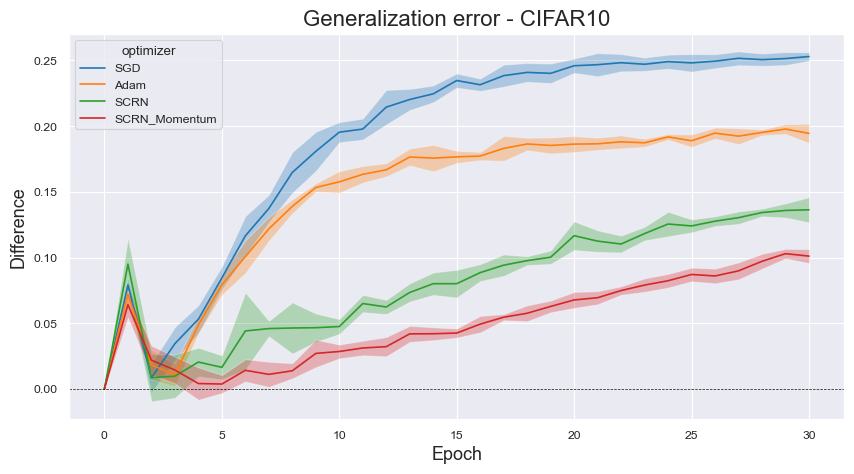

In [24]:
plot_loss_difference(df)

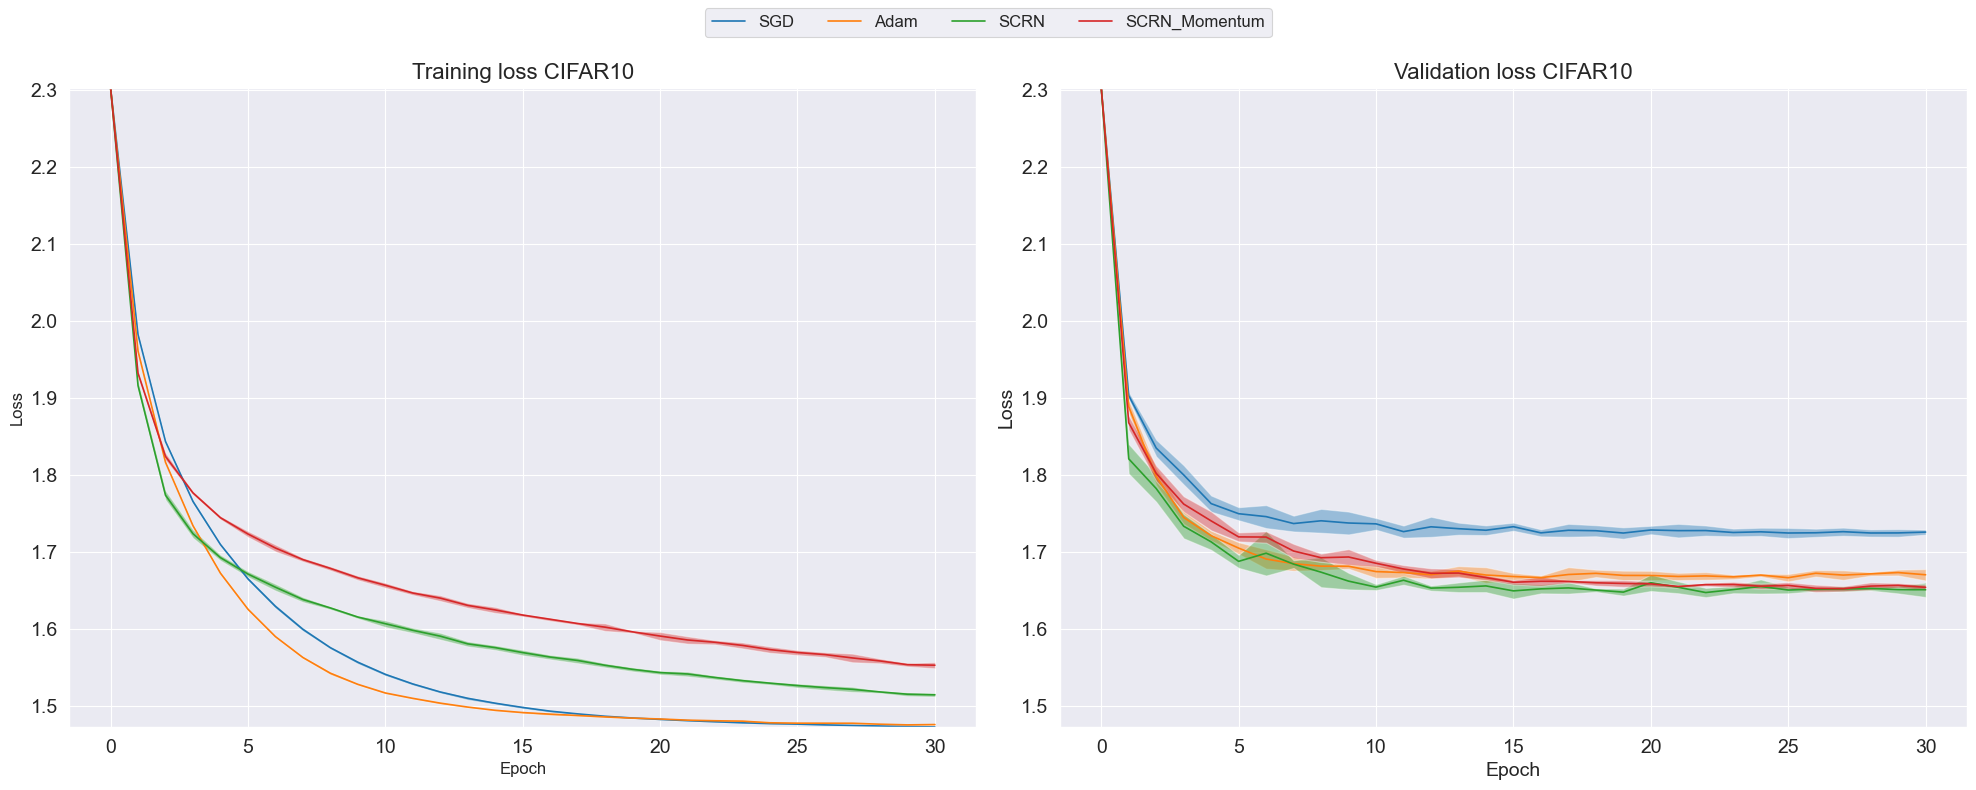

In [25]:
create_comparative_plot(df, "loss", min_loss, max_loss)

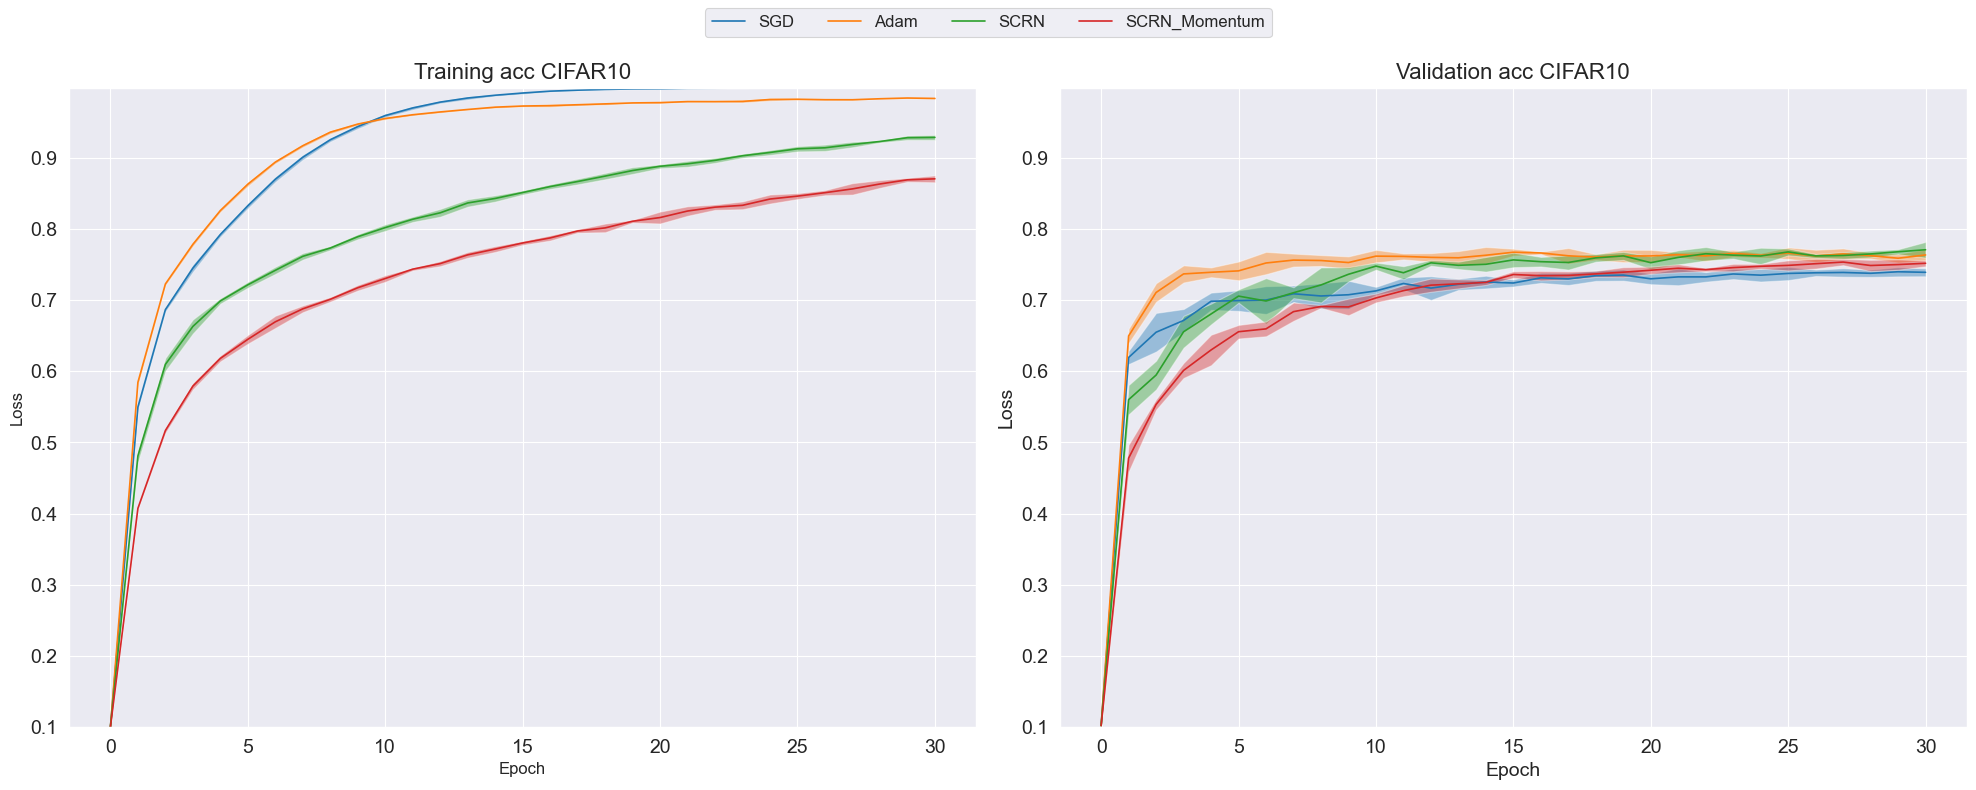

In [26]:
create_comparative_plot(df, "acc", min_acc, max_acc)

In [22]:
dataset = "CIFAR100"
df_cifar100, min_loss, max_loss, min_acc, max_acc = load_info(dataset)
dataset= "MNIST"
df_mnist, min_loss, max_loss, min_acc, max_acc = load_info(dataset)
dataset = "CIFAR10"
df_cifar10, min_loss, max_loss, min_acc, max_acc = load_info(dataset)


In [9]:
df_cifar100

,train_acc,val_acc,val_loss,std_train_acc,std_val_acc,std_val_loss,epoch,train_loss,std_train_loss,optimizer,difference,difference_std
0,0.009813,0.00952,4.605319,0.000486,0.001553,0.000133,0,4.605267,0.000006,SGD,0.000053,0.000133
1,0.141698,0.19052,4.306063,0.003972,0.010350,0.004409,1,4.369354,0.002317,SGD,0.063291,0.004981
2,0.239840,0.23596,4.263171,0.004625,0.012834,0.006176,2,4.264041,0.003419,SGD,0.000870,0.007059
3,0.296729,0.26944,4.231354,0.007421,0.004394,0.003415,3,4.213566,0.003249,SGD,0.017788,0.004714
4,0.339080,0.28512,4.213038,0.005485,0.005859,0.004559,4,4.174845,0.003511,SGD,0.038193,0.005754
...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.369458,0.32796,3.933099,0.005436,0.008864,0.005327,26,3.819701,0.004459,SCRN_Momentum,0.113398,0.006947
27,0.375280,0.33180,3.930829,0.007996,0.007089,0.004613,27,3.814700,0.005249,SCRN_Momentum,0.116128,0.006988
28,0.381733,0.33168,3.930273,0.005440,0.011711,0.007765,28,3.810170,0.004034,SCRN_Momentum,0.120102,0.008750
29,0.389111,0.33480,3.931576,0.010265,0.007301,0.007257,29,3.804576,0.004151,SCRN_Momentum,0.127001,0.008360


In [10]:
df_cifar100.loc[29, "dataset"] = "CIFAR100"
df_cifar10.loc[29, "dataset"] = "CIFAR10"
df_mnist.loc[29, "dataset"] = "MNIST"

data_cifar100 = df_cifar100.loc[29]
data_cifar10  = df_cifar10.loc[29]
data_mnist    = df_mnist.loc[29]



#concat
data = pd.concat([data_cifar100, data_cifar10, data_mnist], axis=0)
data = data[['dataset', 'optimizer', 'difference', 'difference_std']]


dataset_order = ['MNIST', 'CIFAR10', 'CIFAR100']
data['dataset'] = pd.Categorical(data['dataset'], categories=dataset_order, ordered=True)
data.sort_values('dataset', inplace=True)

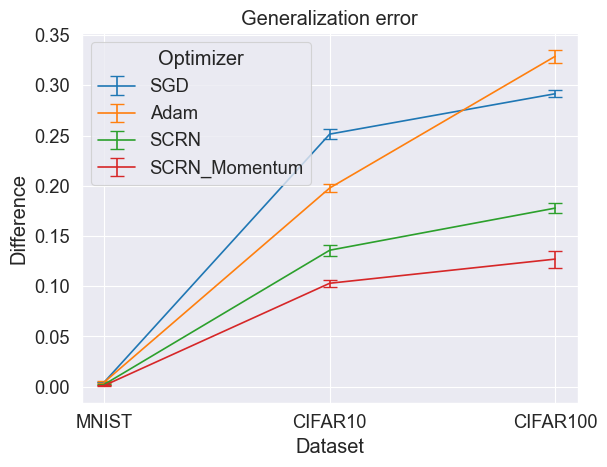

In [11]:

# Creating a figure and axis
fig, ax = plt.subplots()

# Get unique optimizers
optimizers = data['optimizer'].unique()

# Plotting each optimizer as a separate line
for optimizer in optimizers:
    subset = data[data['optimizer'] == optimizer]
    ax.errorbar(subset['dataset'], subset['difference'], yerr=subset['difference_std'], label=optimizer, capsize=5)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Difference')
plt.title('Generalization error')
plt.legend(title='Optimizer')

# Show the plot
plt.show()

<Figure size 2000x1000 with 0 Axes>

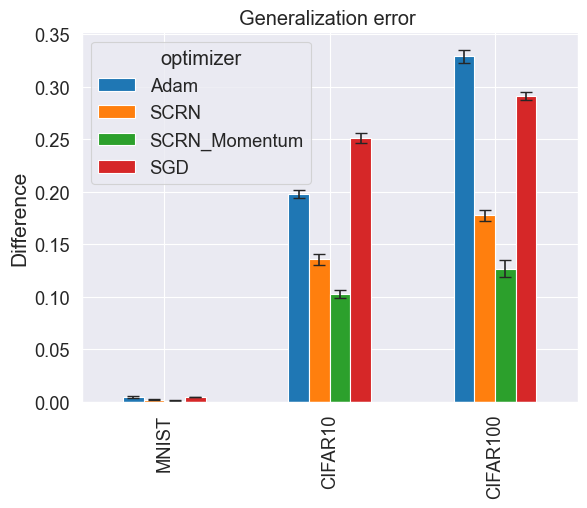

In [12]:
pivot_df = data.pivot(index='dataset', columns='optimizer', values='difference')
errors = data.pivot(index='dataset', columns='optimizer', values='difference_std')
plt.figure(figsize=(20, 10))

# Plotting
pivot_df.plot(kind='bar', yerr=errors, capsize=4)
plt.xlabel('')
plt.ylabel('Difference', fontsize=15)
plt.title('Generalization error ')

plt.show()